[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ignaziogallo/data-mining/blob/aa20-21/tutorials/data/Sampling_bias.ipynb)

[source](https://aquaraga.github.io/python/data-analysis/pandas/2017/05/25/sampling-bias.html)

# Sampling bias

* we wanted to find the average height of an Indian.
* People are interviewed about their heights.
* During the interviews, far **more women than men** were interviewed (interviewed 16000 females and 4000 males).
* This leads to a sample that is **not truly representative** of the actual population.
* If we were to find the average height from this sample, we would probably have a smaller height than expected, considering that the average female height is smaller.

* We’ve unintentionally introduced a **sampling bias**, by biasing the selection towards females. 
* A sampling bias is introduced when one were to **collect a sample in a non-random, non-distributed way**. 
* Let's start with the following (questionable) assumptions:
  *    The **average height** of an Indian female is 151.9 cm and the male 164.9 cm.
  *    The **standard deviation** of female and male heights is 6cm and 7cm respectively

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib notebook

female_heights = np.random.normal(loc = 151.9, scale = 6, size = 16000)
male_heights = np.random.normal(loc = 164.9, scale = 7, size = 4000)

all_heights = np.append(female_heights, male_heights)
all_genders = ['F'] * 16000 + ['M'] * 4000

df = pd.DataFrame({'Gender': all_genders, 'Height': all_heights})

In [3]:
df.tail()

,Gender,Height
19995,M,173.995232
19996,M,167.855609
19997,M,165.989174
19998,M,155.211160
19999,M,161.569998


Let’s plot the height distributions:

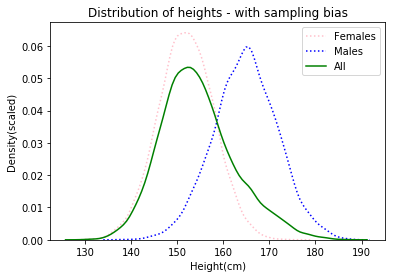

In [4]:
plt.figure()
sns.distplot(pd.Series(female_heights, name = "Height(cm)"), hist = False, label = "Females",
             color='pink', kde_kws={'linestyle': 'dotted'})
sns.distplot(pd.Series(male_heights, name = "Height(cm)"), hist = False, label = "Males", 
             color = 'blue', kde_kws={'linestyle': 'dotted'})
sns.distplot(all_heights, hist = False, label = "All", 
             color = 'green')

plt.gca().set_ylabel('Density(scaled)')
plt.gca().set_title('Distribution of heights - with sampling bias')
plt.legend();

* The previous graph represents an evident **error**: `the ‘All’ distribution follows the ‘Female’ distribution more closely than it should have`. 
* It is clear that we have to ‘**weight**’ the observations: 
   * entries for males, weight = 1
   * entries for females should have weight = (number of males/number of females) = 0.25:

In [6]:
def set_weight(row):
    if row['Gender'] == 'F':
        row['Weight'] = 0.25
    else:
        row['Weight'] = 1
    return row

df_with_weights = df.apply(set_weight, axis = 1)
df_with_weights.head()

,Gender,Height,Weight
0,F,160.110492,0.25
1,F,149.014927,0.25
2,F,158.332024,0.25
3,F,160.331739,0.25
4,F,150.365602,0.25


In [7]:
df_with_weights.tail()

,Gender,Height,Weight
19995,M,173.995232,1.0
19996,M,167.855609,1.0
19997,M,165.989174,1.0
19998,M,155.211160,1.0
19999,M,161.569998,1.0


## Extract a sub-sample
The pandas `DataFrame` provides a `sample` method, where we can extract a sub-sample from our original dataframe.

Let’s extract a sample of size 2000:

In [8]:
sample = df_with_weights.sample(n=2000, weights='Weight')
print('Number of males: ', sample[sample.Gender == 'M'].shape[0])
print('Number of females: ', sample[sample.Gender == 'F'].shape[0])

Number of males:  936
Number of females:  1064


The above seems to represent the gender ratio more realistically. 

The distribution for the sample distribution looks like:

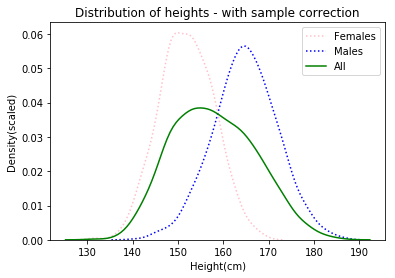

In [9]:
plt.figure()
sns.distplot(pd.Series(sample[sample.Gender == 'F'].Height, name = "Height(cm)"), hist = False, label = "Females",
             color='pink', kde_kws={'linestyle': 'dotted'})
sns.distplot(pd.Series(sample[sample.Gender == 'M'].Height, name = "Height(cm)"), hist = False, label = "Males", 
             color = 'blue', kde_kws={'linestyle': 'dotted'})
sns.distplot(sample.Height, hist = False, label = "All", 
             color = 'green')

plt.gca().set_xlabel('Height(cm)')
plt.gca().set_ylabel('Density(scaled)')
plt.gca().set_title('Distribution of heights - with sample correction')
plt.legend();

* Although we considered only ‘Gender’, several **other variables** could have contributed to sampling bias such as ‘Age’, ‘State’
* The ‘Weight’ that we assign to each observation should therefore consider each of the above factors into account.

`Another good example` of a sampling bias was **US election polls** that used `landlines` to contact attendees. 
* This hasn't been a problem for a long time. 
* In recent years, an increasing number of homes have become mobile only: especially with people under 30. 
* By not reaching mobile phones, **some age groups may be underrepresented**. 